In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from interaction_permutation_importance import *
import matplotlib.pyplot as plt

In [2]:
def visualize_result(result, ax = None):
    df = pd.DataFrame(result['importances']).T
    df.columns = result['variable_names']
    if ax:
        df.plot.box(ax = ax)
    else:
        df.plot.box()

def visualize_result_mse(result, ax = None):
    df = pd.DataFrame(result['mean_squared_errors']).T
    df.columns = result['variable_names']
    if ax:
        df.plot.box(ax = ax)
    else:
        df.plot.box()

In [3]:
def confidence_interval(result):
    interval =  [f"{x.round(3)}" + "-" f"{y.round(3)}" for x, y in zip(result['importances_mean']-  result['importances_me'], result['importances_mean'] +  result['importances_me'])]
    colnames = result['variable_names']
    df = pd.DataFrame(interval).T
    df.columns = colnames
    df.index = ['confidence interval']
    return df

def confidence_interval_mse(result):
    interval =  [f"{x.round(3)}" + "-" f"{y.round(3)}" for x, y in zip(np.mean(result['mean_squared_errors'], axis = 1)-  result['importances_me'], np.mean(result['mean_squared_errors'], axis = 1) +  result['importances_me'])]
    colnames = result['variable_names']
    df = pd.DataFrame(interval).T
    df.columns = colnames
    df.index = ['confidence interval_mse']
    return df

In [4]:
def gen_X(num_var: int, sample_size : int):
    data_dictionary = {}
    for i in range(num_var):
        var_name = "x" + f"{i + 1}"
        data_dictionary[var_name] = list(np.random.binomial(1, .5, sample_size))
    return pd.DataFrame(data_dictionary)


# Experiment 1

There is no interaction effects

### Experiment 1-1 Only one main effect

In [5]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

In [6]:
reg = DecisionTreeRegressor(ccp_alpha = 0.05)
reg.fit(df[['x1','x2','x3']], df.y)
y_pred = reg.predict(X_test)
benchmark = mean_squared_error(y_test, y_pred)

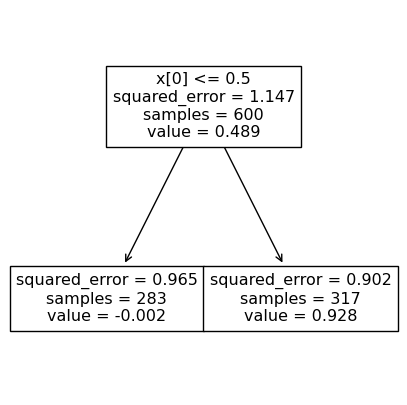

In [7]:
fig, ax = plt.subplots(1,1, figsize = (5, 5))
plot_tree(reg, ax = ax)
plt.show()

In [8]:
benchmark

1.0194215444893608

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.171-0.173,0.0-0.0,0.0-0.0,0.171-0.173,0.171-0.173,0.0-0.0,0.171-0.173
confidence interval_mse,0.979-0.982,0.809-0.809,0.809-0.809,0.979-0.982,0.979-0.982,0.809-0.809,0.979-0.982


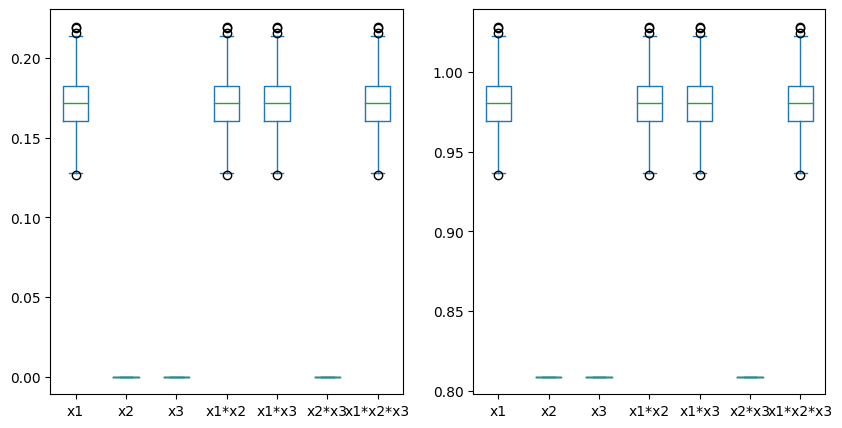

In [9]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 500, mae = True)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
visualize_result(result, ax = ax[0])
visualize_result_mse(result, ax = ax[1])
pd.concat([confidence_interval(result), confidence_interval_mse(result)])

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.479-0.486,0.0-0.0,0.0-0.0,0.477-0.485,0.476-0.483,0.0-0.0,0.478-0.485


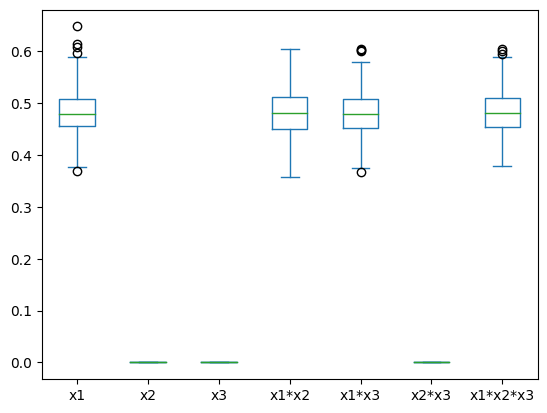

In [10]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.478-0.486,0.0-0.0,0.0-0.0,0.478-0.485,0.477-0.484,0.0-0.0,0.476-0.483


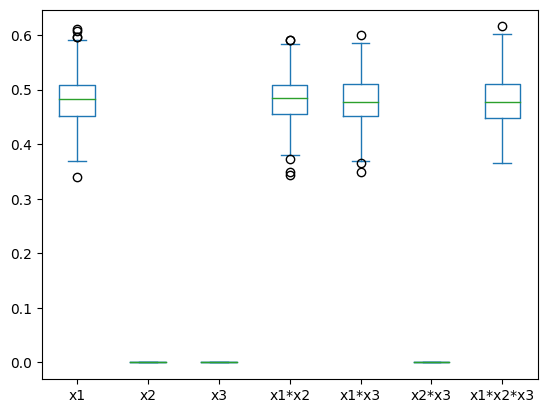

In [11]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

### Experiment 1-2 Two main effects only

In [12]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) + seq.x2 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

In [13]:
reg = DecisionTreeRegressor(ccp_alpha = 0.05)
reg.fit(df[['x1','x2','x3']], df.y)

DecisionTreeRegressor(ccp_alpha=0.05)

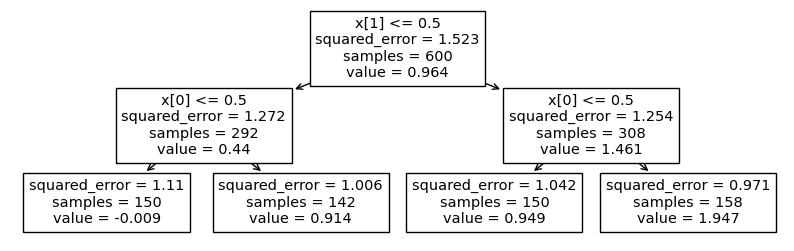

In [14]:
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.199-0.202,0.161-0.164,0.0-0.0,0.317-0.321,0.199-0.202,0.161-0.164,0.317-0.321
confidence interval_mse,0.979-0.982,0.94-0.943,0.779-0.779,1.097-1.1,0.979-0.982,0.94-0.943,1.097-1.1


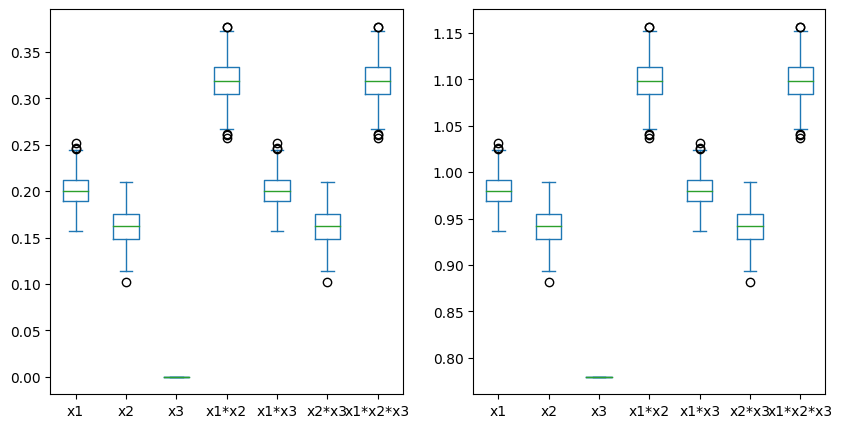

In [15]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 500, mae = True)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
visualize_result(result, ax = ax[0])
visualize_result_mse(result, ax = ax[1])
pd.concat([confidence_interval(result), confidence_interval_mse(result)])

In [16]:
(result['importances'][3] - result['importances'][0] - result['importances'][1]).mean()

-0.04415426215973826

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.517-0.525,0.402-0.409,0.0-0.0,0.9-0.912,0.518-0.526,0.401-0.409,0.9-0.912


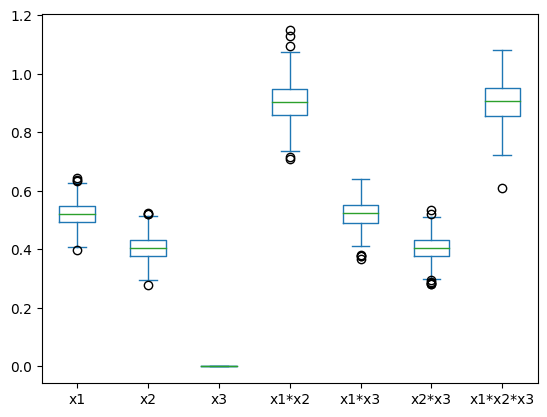

In [17]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.518-0.526,0.401-0.409,0.0-0.0,0.906-0.918,0.515-0.523,0.399-0.407,0.91-0.921


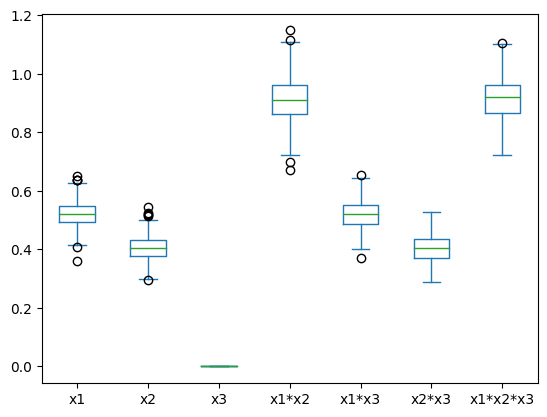

In [18]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

# Experimnt 2: When there are one main effect and one interaction effect

In [21]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1+ 1 * (seq.x1) + seq.x2 * seq.x3 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) + seq.x2 *seq.x3 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

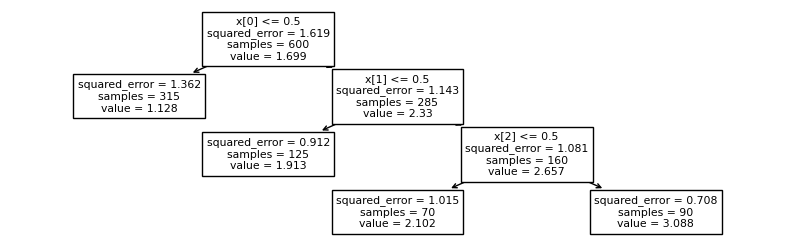

In [27]:
reg = DecisionTreeRegressor(ccp_alpha = 0.05)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
fig.savefig('decision_tree_example_1')
plt.show()

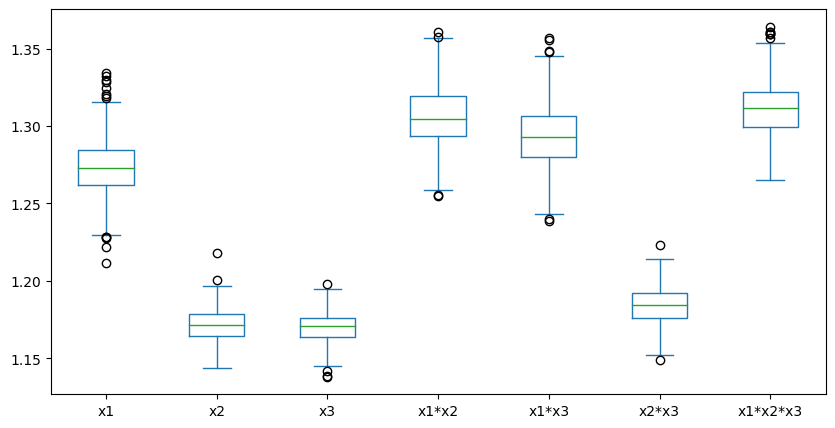

In [28]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 500, mae = True)
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
visualize_result_mse(result, ax = ax)
fig.savefig('permutation_score_plot_example_1_1.png')

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.134-0.137,0.034-0.036,0.03-0.032,0.166-0.17,0.153-0.156,0.046-0.048,0.172-0.175
confidence interval_mse,1.272-1.275,1.172-1.174,1.169-1.17,1.305-1.308,1.291-1.294,1.185-1.187,1.31-1.313


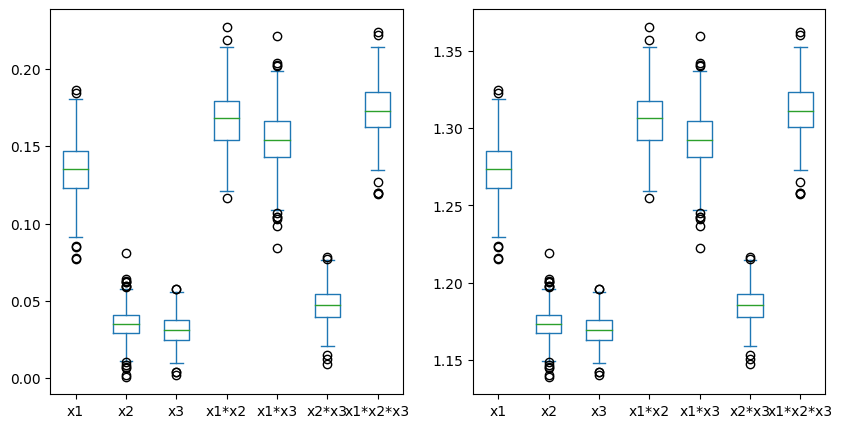

In [25]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 500, mae = True)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
visualize_result(result, ax = ax[0])
visualize_result_mse(result, ax = ax[1])
pd.concat([confidence_interval(result), confidence_interval_mse(result)])

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.448-0.456,0.145-0.149,0.119-0.122,0.568-0.576,0.56-0.568,0.21-0.215,0.629-0.638


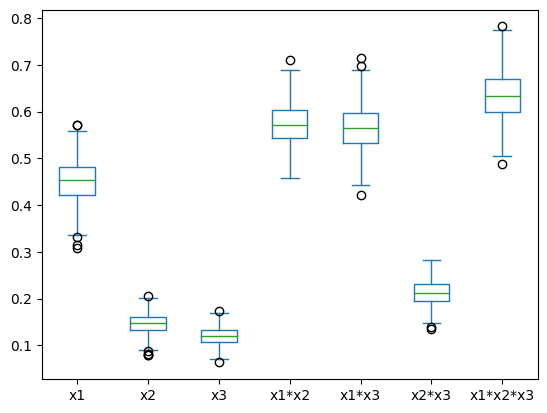

In [22]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.446-0.453,0.147-0.151,0.12-0.124,0.568-0.577,0.557-0.565,0.21-0.215,0.63-0.638


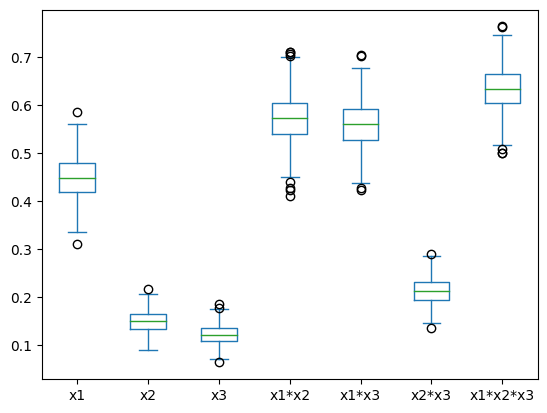

In [23]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

### Experiment: One main and one interaction effect where the main effect variable is part of the interaction effect

In [19]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 * seq.x1 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) + seq.x2 *seq.x1 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

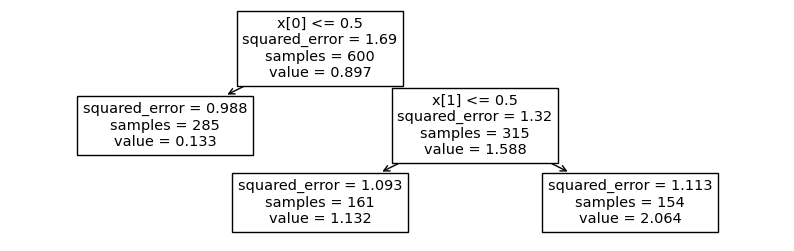

In [20]:
reg = DecisionTreeRegressor(ccp_alpha = 0.03)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.406-0.411,0.095-0.097,0.0-0.0,0.444-0.449,0.406-0.411,0.095-0.097,0.444-0.449
confidence interval_mse,1.241-1.246,0.93-0.932,0.835-0.835,1.279-1.284,1.241-1.246,0.93-0.932,1.279-1.284


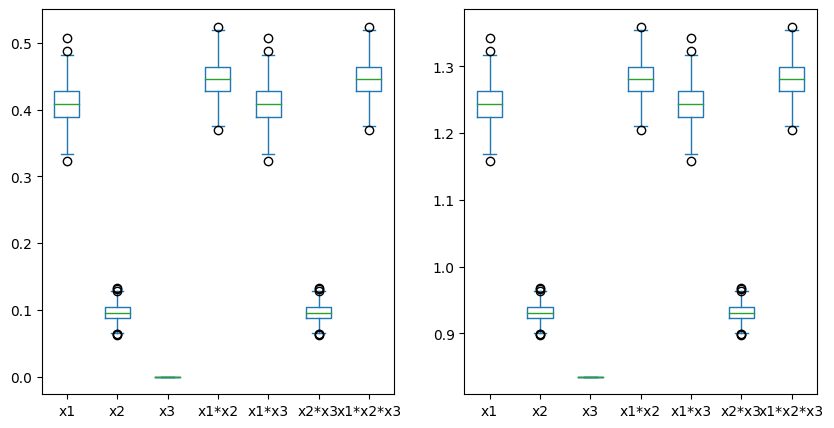

In [21]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 500, mae = True)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
visualize_result(result, ax = ax[0])
visualize_result_mse(result, ax = ax[1])
pd.concat([confidence_interval(result), confidence_interval_mse(result)])

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.393-1.41,0.19-0.195,0.0-0.0,1.543-1.559,1.388-1.403,0.185-0.189,1.536-1.552


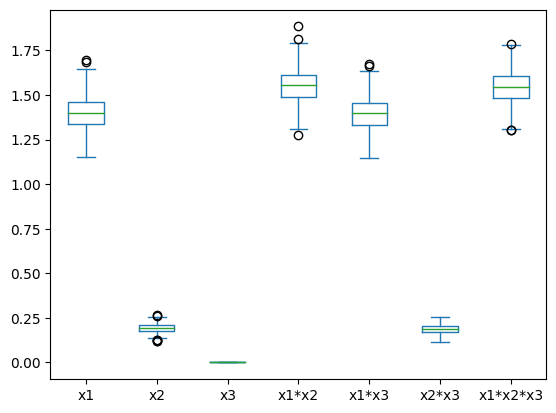

In [29]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.393-1.409,0.188-0.193,0.0-0.0,1.519-1.535,1.39-1.407,0.187-0.192,1.524-1.54


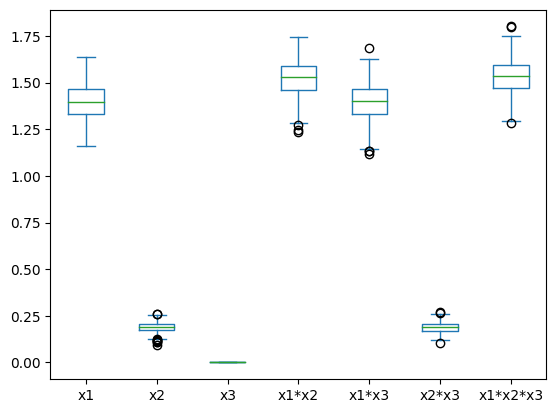

In [30]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

### Example: x1, x2, and x1x2

In [50]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 +  seq.x2 * seq.x1 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) +  seq.x2 + seq.x2 *seq.x1 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

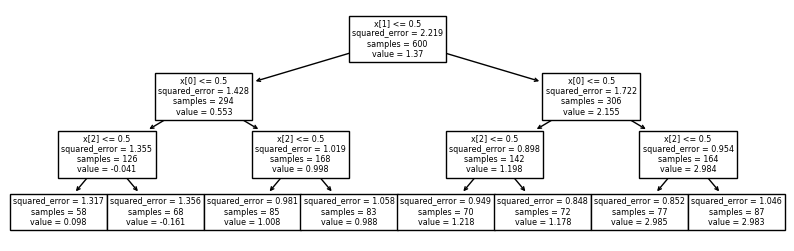

In [51]:
reg = DecisionTreeRegressor(ccp_alpha = 0.00)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.36-0.364,0.41-0.415,0.0-0.001,0.65-0.656,0.358-0.363,0.407-0.412,0.646-0.652
confidence interval_mse,1.19-1.194,1.241-1.246,0.83-0.831,1.48-1.486,1.189-1.193,1.237-1.242,1.476-1.482


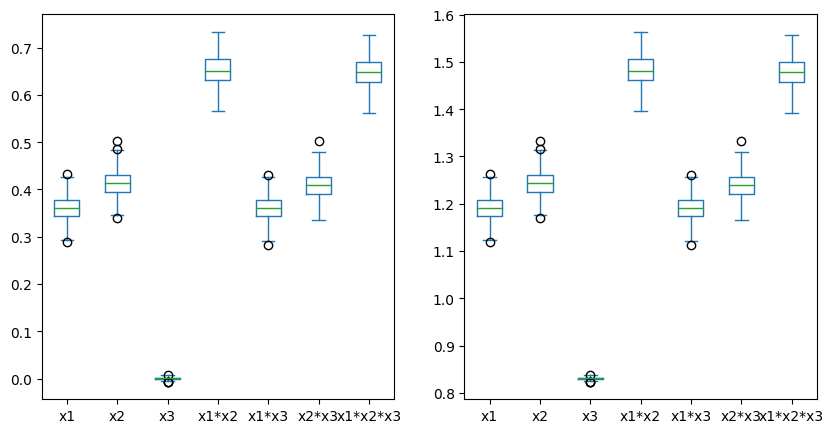

In [52]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 500, mae = True)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
visualize_result(result, ax = ax[0])
visualize_result_mse(result, ax = ax[1])
pd.concat([confidence_interval(result), confidence_interval_mse(result)])

### Example: x1, x2, and x2*x3

In [53]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 + seq.x2*seq.x3 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq:  1 * (seq.x1) + seq.x2 + seq.x2*seq.x3  + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

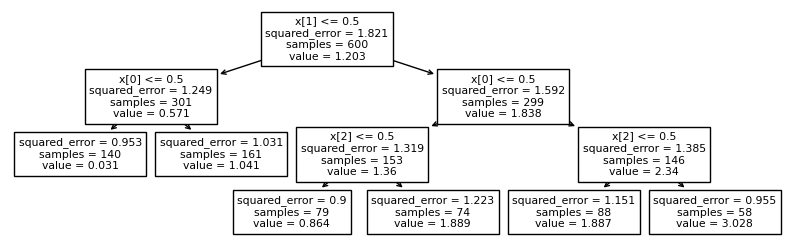

In [54]:
reg = DecisionTreeRegressor(ccp_alpha = 0.03)
reg.fit(df[['x1','x2','x3']], df.y)
y_pred = reg.predict(X_test)
benchmark = mean_squared_error(y_test, y_pred)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.198-0.201,0.366-0.37,0.115-0.117,0.537-0.542,0.294-0.298,0.444-0.449,0.606-0.612
confidence interval_mse,0.993-0.996,1.161-1.166,0.91-0.912,1.332-1.338,1.089-1.093,1.239-1.244,1.402-1.407


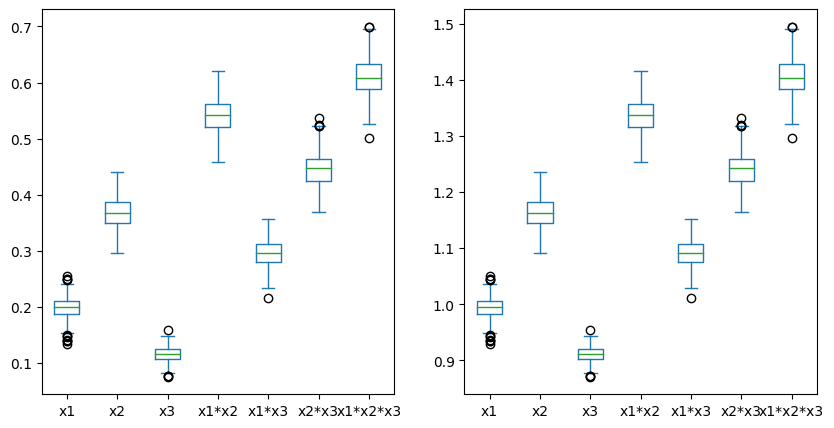

In [55]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 500, mae = True)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
visualize_result(result, ax = ax[0])
visualize_result_mse(result, ax = ax[1])
pd.concat([confidence_interval(result), confidence_interval_mse(result)])

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.53-0.533,1.186-1.19,0.314-0.316,1.841-1.847,0.867-0.871,1.393-1.398,2.075-2.082


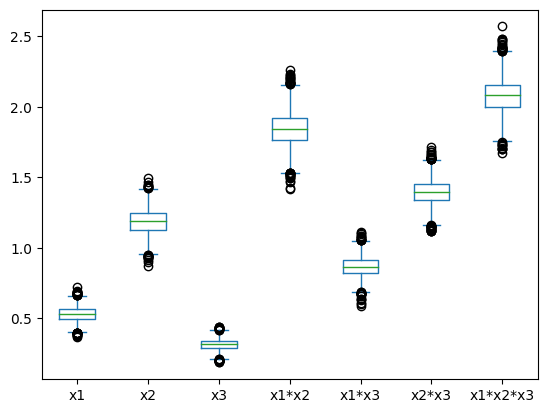

In [56]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 5000)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.531-0.533,1.186-1.19,0.314-0.316,1.786-1.793,0.862-0.866,1.374-1.379,1.979-1.986


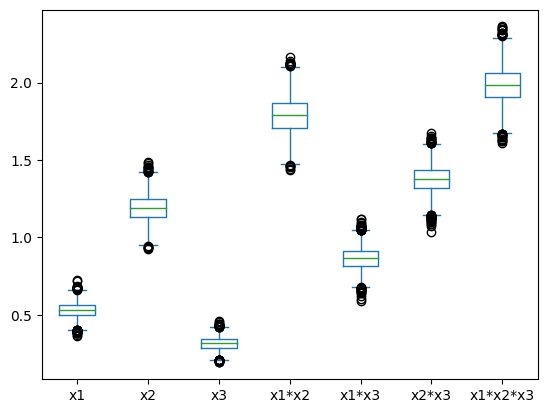

In [57]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 5000)
visualize_result(result)
confidence_interval(result)

### Example: x1, x2, x1 * x2 and x2*x3

In [58]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 + seq.x1*seq.x2 + seq.x2*seq.x3 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq:  1 * (seq.x1) + seq.x2 + seq.x1*seq.x2 + seq.x2*seq.x3 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

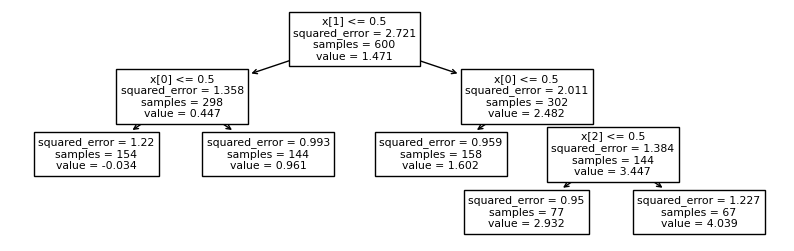

In [59]:
reg = DecisionTreeRegressor(ccp_alpha = 0.05)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.359-0.361,0.602-0.604,0.051-0.052,0.807-0.809,0.4-0.402,0.621-0.623,0.836-0.838
confidence interval_mse,1.218-1.22,1.461-1.463,0.91-0.911,1.666-1.668,1.26-1.261,1.48-1.482,1.695-1.697


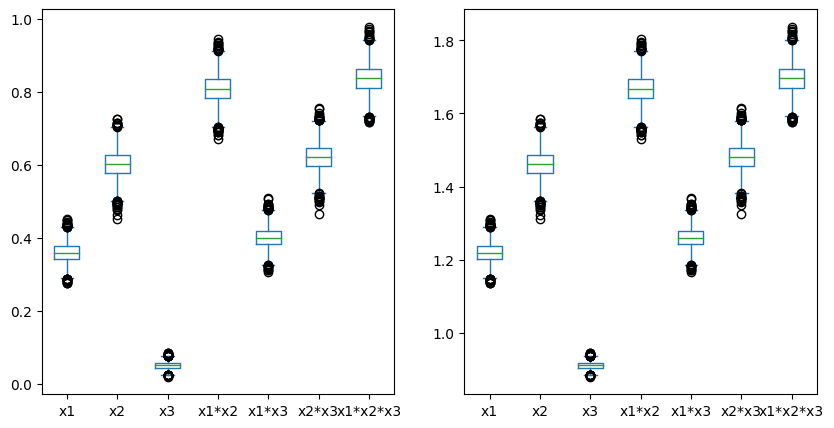

In [60]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 5000, mae = True)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
visualize_result(result, ax = ax[0])
visualize_result_mse(result, ax = ax[1])
pd.concat([confidence_interval(result), confidence_interval_mse(result)])

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.193-1.197,2.235-2.243,0.144-0.145,3.223-3.233,1.386-1.392,2.275-2.282,3.364-3.374


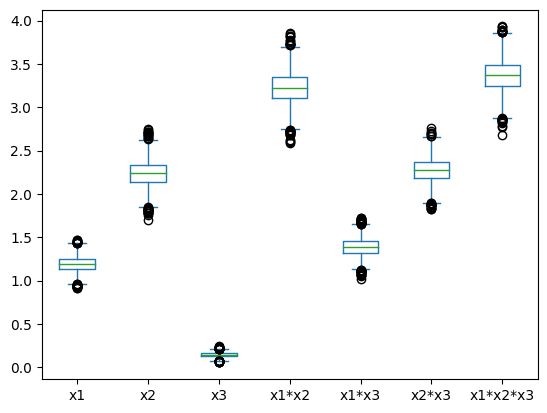

In [61]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 5000)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.19-1.195,2.234-2.242,0.144-0.145,3.246-3.257,1.353-1.359,2.272-2.28,3.323-3.334


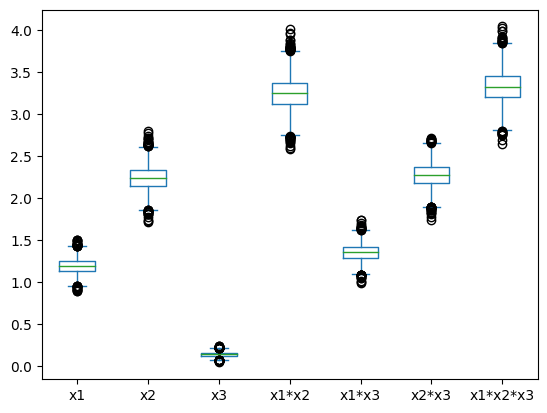

In [62]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 5000)
visualize_result(result)
confidence_interval(result)

In [63]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 + seq.x1*seq.x2 + seq.x2*seq.x3 + seq.x1 *seq.x2*seq.x3 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq:  1 * (seq.x1) + seq.x2 + seq.x1*seq.x2 + seq.x1 * seq.x2*seq.x3 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

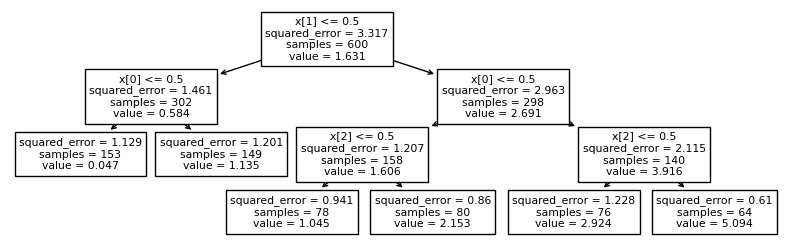

In [69]:
reg = DecisionTreeRegressor(ccp_alpha = 0.03)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.439-0.441,0.473-0.475,0.045-0.046,0.817-0.819,0.449-0.45,0.542-0.544,0.859-0.862
confidence interval_mse,1.413-1.415,1.447-1.449,1.019-1.02,1.791-1.793,1.423-1.425,1.516-1.518,1.834-1.836


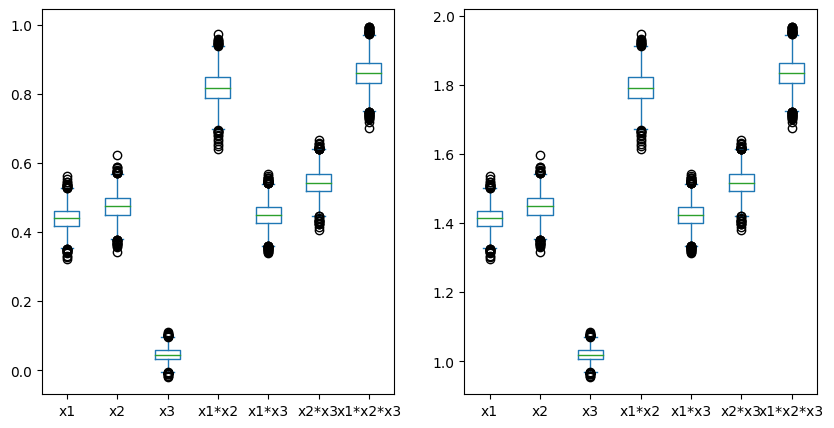

In [70]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 5000, mae = True)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
visualize_result(result, ax = ax[0])
visualize_result_mse(result, ax = ax[1])
pd.concat([confidence_interval(result), confidence_interval_mse(result)])

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.862-1.87,1.862-1.87,0.156-0.159,3.704-3.717,1.868-1.876,2.181-2.19,3.925-3.937


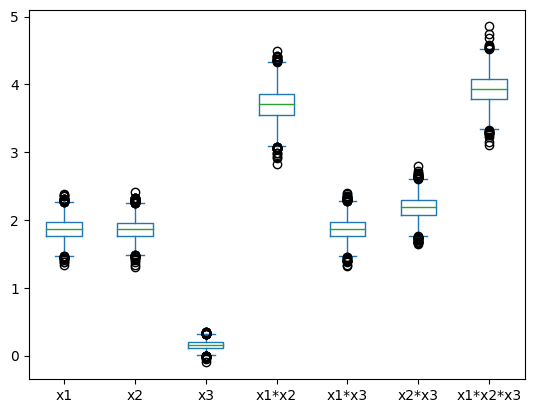

In [71]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 5000)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.864-1.872,1.865-1.873,0.158-0.161,3.591-3.604,1.894-1.903,2.081-2.09,3.723-3.736


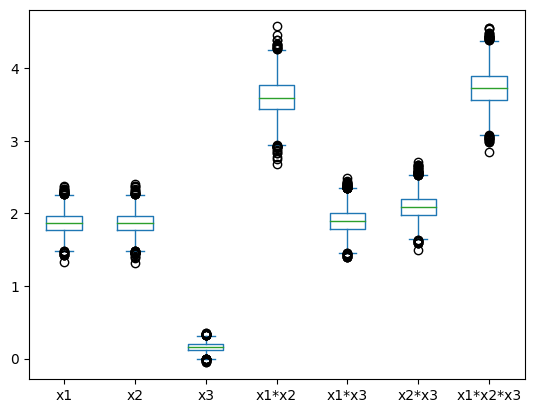

In [72]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 5000)
visualize_result(result)
confidence_interval(result)

In [73]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 + 0.1* seq.x3 + seq.x1*seq.x2 + 3* seq.x2*seq.x3 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) + seq.x2 + 0.1* seq.x3 + seq.x1*seq.x2 + 3* seq.x2*seq.x3 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

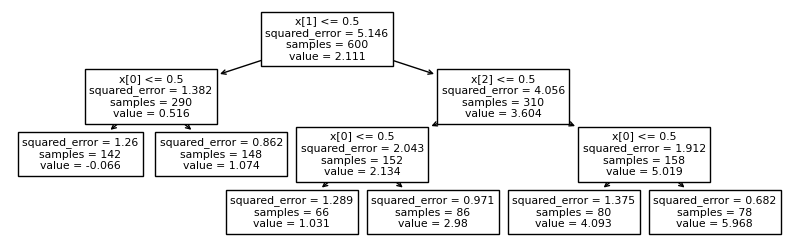

In [74]:
reg = DecisionTreeRegressor(ccp_alpha = 0.05)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.358-0.359,1.077-1.081,0.512-0.513,1.271-1.274,0.729-0.731,1.283-1.285,1.411-1.414
confidence interval_mse,1.17-1.171,1.89-1.893,1.324-1.326,2.083-2.087,1.541-1.543,2.095-2.098,2.224-2.226


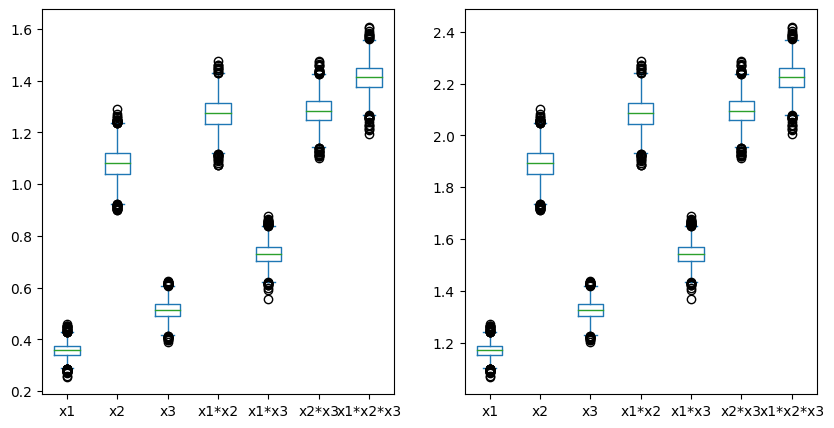

In [75]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 5000, mae = True)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
visualize_result(result, ax = ax[0])
visualize_result_mse(result, ax = ax[1])
pd.concat([confidence_interval(result), confidence_interval_mse(result)])

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.193-1.197,2.235-2.243,0.144-0.145,3.223-3.233,1.386-1.392,2.275-2.282,3.364-3.374


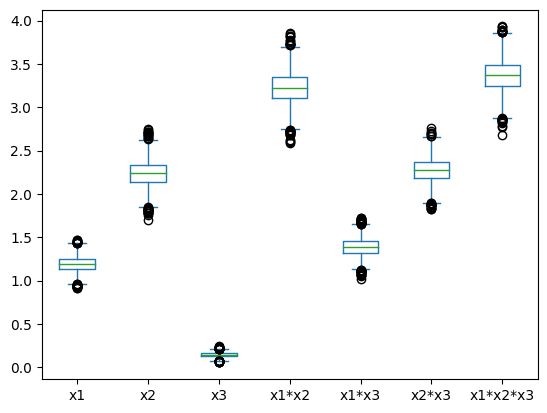

In [ ]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 5000)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.19-1.195,2.234-2.242,0.144-0.145,3.246-3.257,1.353-1.359,2.272-2.28,3.323-3.334


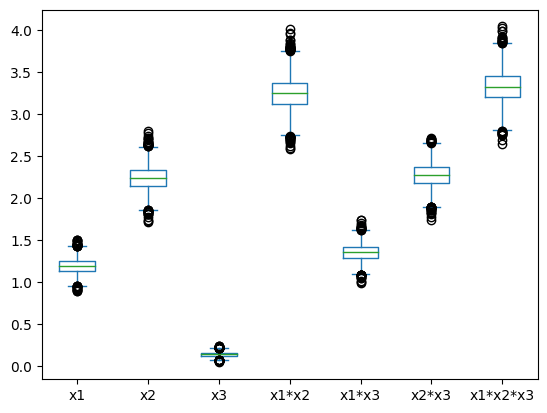

In [ ]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 5000)
visualize_result(result)
confidence_interval(result)

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from interaction_permutation_importance import *
import matplotlib.pyplot as plt

def gen_X(num_var: int, sample_size : int):
    data_dictionary = {}
    for i in range(num_var):
        var_name = "x" + f"{i + 1}"
        data_dictionary[var_name] = list(np.random.binomial(1, .5, sample_size))
    return pd.DataFrame(data_dictionary)


In [2]:
import sys
import os
sys.path.append('/root/barcode/')
from BarcodeScanner import tree_and_clustering

$$ 1 + x_1 + x_2 + x_2 x_3 + \epsilon_i $$

In [3]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1+  1 * (seq.x1) + seq.x2 + seq.x2*seq.x3 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1+  1 * (seq.x1) + seq.x2 + seq.x2*seq.x3  + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

In [4]:
reg = DecisionTreeRegressor(ccp_alpha = 0.03)
tree = tree_and_clustering(df.iloc[:, :3], df.iloc[:, -1], tree_model= reg)

In [5]:
tree.original_columns

['x1', 'x2', 'x3']

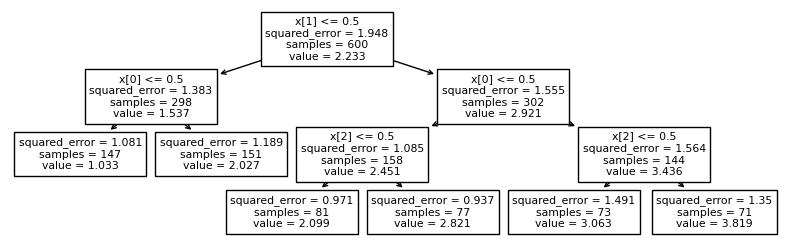

In [50]:
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(tree.estimator, ax = ax)
fig.savefig('decision_tree_example_2.png')
plt.show()

In [13]:
print(df.sample(6).to_latex(index = False))

\begin{tabular}{rrrr}
\toprule
x1 & x2 & x3 & y \\
\midrule
1 & 0 & 0 & 2.694330 \\
0 & 1 & 1 & 2.351441 \\
0 & 1 & 1 & 1.244387 \\
1 & 0 & 0 & 3.016470 \\
0 & 0 & 1 & 1.823699 \\
1 & 1 & 0 & 4.454354 \\
\bottomrule
\end{tabular}



In [15]:
tree.predict_from_training()

,x1,x2,x3,group_means,mse,count
0,0,0,0,1.033142,1.315697,71
1,0,0,1,1.033142,0.861891,76
2,0,1,0,2.098684,0.970912,81
3,0,1,1,2.821375,0.936626,77
4,1,0,0,2.027182,1.419495,70
5,1,0,1,2.027182,0.989463,81
6,1,1,0,3.063377,1.491152,73
7,1,1,1,3.819125,1.349971,71


In [16]:
tree.L_inv

array([[ 1,  0,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  1,  0,  0,  0],
       [-1,  0,  1,  0,  0,  0,  0,  0],
       [-1,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0, -1,  0, -1,  0,  1,  0],
       [ 1, -1,  0,  0, -1,  1,  0,  0],
       [ 1, -1, -1,  1,  0,  0,  0,  0],
       [-1,  1,  1, -1,  1, -1, -1,  1]], dtype=int8)

In [22]:
tree_pred = tree.predict_from_training()
tree_pred = tree_pred.reset_index()
tree_pred.columns = ['$z$','$x_1$', '$x_2$', '$x_3$', "$\hat{y}$", "mse", "$n_{z}$"]
tree_pred = tree_pred.drop('mse', axis= 1)
print(tree_pred.to_latex(index = False))

\begin{tabular}{rrrrrr}
\toprule
$z$ & $x_1$ & $x_2$ & $x_3$ & $\hat{y}$ & $n_{z}$ \\
\midrule
0 & 0 & 0 & 0 & 1.033142 & 71 \\
1 & 0 & 0 & 1 & 1.033142 & 76 \\
2 & 0 & 1 & 0 & 2.098684 & 81 \\
3 & 0 & 1 & 1 & 2.821375 & 77 \\
4 & 1 & 0 & 0 & 2.027182 & 70 \\
5 & 1 & 0 & 1 & 2.027182 & 81 \\
6 & 1 & 1 & 0 & 3.063377 & 73 \\
7 & 1 & 1 & 1 & 3.819125 & 71 \\
\bottomrule
\end{tabular}



In [23]:
pdist = tree.init_pdist

In [31]:
print(pd.DataFrame(pdist).to_latex(index = True, columns = None, float_format = "%.3f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\midrule
0 & 0.000 & 0.000 & 6.354 & 10.568 & 5.458 & 5.915 & 11.188 & 15.449 \\
1 & 0.000 & 0.000 & 6.816 & 11.356 & 5.821 & 6.342 & 11.911 & 16.491 \\
2 & 6.354 & 6.816 & 0.000 & 4.594 & 0.420 & 0.457 & 5.691 & 10.224 \\
3 & 10.568 & 11.356 & 4.594 & 0.000 & 4.627 & 5.036 & 1.414 & 5.875 \\
4 & 5.458 & 5.821 & 0.420 & 4.627 & 0.000 & 0.000 & 5.639 & 9.808 \\
5 & 5.915 & 6.342 & 0.457 & 5.036 & 0.000 & 0.000 & 6.100 & 10.626 \\
6 & 11.188 & 11.911 & 5.691 & 1.414 & 5.639 & 6.100 & 0.000 & 4.152 \\
7 & 15.449 & 16.491 & 10.224 & 5.875 & 9.808 & 10.626 & 4.152 & 0.000 \\
\bottomrule
\end{tabular}



In [39]:
(np.count_nonzero(pdist < 0.5) - pdist.shape[0])/2


4.0

In [40]:
eig = np.linalg.eigvals(pdist).round(2)
eig = pd.Series(eig)

In [41]:
eig.abs().sort_values(ascending = False).to_list()

[49.98, 28.9, 14.15, 5.17, 1.2, 0.56, 0.02, 0.02]

In [42]:
tree.gen_mu_contrast_from_cluster(4)

array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0., -1.,  0.]])

In [52]:
print(pd.DataFrame(tree.gen_mu_contrast_from_cluster(4)).to_latex(index = True, columns = None, float_format = "%.0f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\midrule
0 & 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 & -1 & 0 & 0 & 0 \\
2 & 0 & 0 & 1 & 0 & 0 & -1 & 0 & 0 \\
3 & 0 & 0 & 0 & 1 & 0 & 0 & -1 & 0 \\
\bottomrule
\end{tabular}



In [54]:
tree.gen_projection_matrix_mu(4).round(2)

array([[0.5 , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.33, 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.33, 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.33, 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [43]:
tree.cluster(4, )['cluster']

{'cluster_0':    x1  x2  x3         y  barcode
 0   1   1   1  3.819125        7,
 'cluster_1':    x1  x2  x3         y  barcode
 0   0   0   0  1.094873        0
 1   0   0   1  0.975474        1,
 'cluster_2':    x1  x2  x3         y  barcode
 0   0   1   0  2.098684        2
 1   1   0   0  2.028695        4
 2   1   0   1  2.025875        5,
 'cluster_3':    x1  x2  x3         y  barcode
 0   0   1   1  2.821375        3
 1   1   1   0  3.063377        6}

In [44]:
tree.cluster(4)['cluster']['cluster_0']

,x1,x2,x3,y,barcode
0,1,1,1,3.819125,7


In [45]:
tree.cluster(4)['cluster']['cluster_1']

,x1,x2,x3,y,barcode
0,0,0,0,1.094873,0
1,0,0,1,0.975474,1


In [46]:
tree.cluster(4)['cluster']['cluster_2']

,x1,x2,x3,y,barcode
0,0,1,0,2.098684,2
1,1,0,0,2.028695,4
2,1,0,1,2.025875,5


In [47]:
tree.cluster(4)['cluster']['cluster_3']

,x1,x2,x3,y,barcode
0,0,1,1,2.821375,3
1,1,1,0,3.063377,6


In [48]:
tree.init_beta_hat

array([ 1.03314244,  0.99403985,  1.06554191,  0.        , -0.0293473 ,
        0.        ,  0.72269106,  0.0330568 ])

In [55]:
tree.get_projected_beta_hat(4).round(3)

array([ 1.033,  1.018,  1.018,  0.   , -0.127,  0.   ,  0.891, -0.015])

In [25]:
tree.original_columns

['x1', 'x2', 'x3']

In [26]:
tree.beta_names

['beta0',
 'beta1',
 'beta2',
 'beta3',
 'beta1*beta2',
 'beta1*beta3',
 'beta2*beta3',
 'beta1*beta2*beta3']

In [57]:
result = pd.DataFrame(np.abs(tree.get_projected_beta_hat(4)).reshape(1, -1), columns = tree.beta_names, index = ['importance'])

In [62]:
print(result.T.sort_values('importance', ascending = False).round(3).to_latex(index= True, float_format = "%.3f"))

\begin{tabular}{lr}
\toprule
 & importance \\
\midrule
beta0 & 1.033 \\
beta1 & 1.018 \\
beta2 & 1.018 \\
beta2*beta3 & 0.891 \\
beta1*beta2 & 0.127 \\
beta1*beta2*beta3 & 0.015 \\
beta3 & 0.000 \\
beta1*beta3 & 0.000 \\
\bottomrule
\end{tabular}



$$ 1 + x_1 + x_2 + x_2 x_3 + \epsilon_i $$

In [29]:
type(np.array([1,2,3]))

numpy.ndarray

In [ ]:
from BarcodeScanner import rf_and_clustering

In [63]:
from dataclasses import dataclass

@dataclass
class summary:
    summary: pd.DataFrame
    mu_hat: np.ndarray
    mu_var: np.ndarray
    beta_hat: np.ndarray
    beta_var: np.ndarray
    pdist_kwargs: dict
    pdist: np.ndarray
    init_cluster_idx: list

class rf_and_clustering(tree_and_clustering):
    def __init__(self, X, y, random_forest_model):
        super().__init__(X, y, tree_model = random_forest_model)
        self.estimators = self.estimator.estimators_

    def _gen_summary(self, estimator):
        full_df = self.full_df.copy()
        full_df['y_hat'] = estimator.predict(full_df.loc[:, self.original_columns].to_numpy())
        full_df['sq'] = (full_df.y_hat - full_df.y)**2
        summary = full_df.groupby(self.original_columns).agg({"y_hat": np.mean, "sq": [lambda x: x.sum()/x.count(), 'count']}).reset_index()
        summary.columns = self.original_columns + ['group_means','mse','count']
        return summary
    
    def _gen_cluster_idx(self, sample_sizes_by_cluster):
        clusters = []
        last = 0
        for n in sample_sizes_by_cluster:
            clusters.append([x for x in range(last, n+last)])
            last += n
        return clusters
    
    def _single_clustering(self, n_clusters, pdist, init_custer_idx):
        result = self.agglomerative_clustering(pairwise_distances = pdist, n_clusters = n_clusters, clusters = init_cluster_idx)
        cluster_idx = result[0]
        final_pdist = result[1]
        cluster_df = {}
        for cluster_id, cluster_index in enumerate(cluster_idx):
            cluster_id_name = f"cluster_{cluster_id}"
            cluster_df[cluster_id_name] = self.full_df.loc[cluster_index,:].copy()
            cluster_df[cluster_id_name] = cluster_df[cluster_id_name].groupby(self.original_columns).agg(np.mean).reset_index()
            cluster_df[cluster_id_name]['barcode'] = self.gen_barcode((cluster_df[cluster_id_name].loc[:, self.original_columns]))
        return {"cluster": cluster_df, "final_pdist": final_pdist}

    def _gen_statistics(self, estimator):
        summary_table = self._gen_summary(estimator)
        mu_hat = summary_table.group_means.to_numpy().reshape(-1)
        mu_var = np.diag(summary_table.mse/summary_table['count'])
        beta_hat = self.L_inv @ mu_hat
        beta_var = self.L_inv @ mu_var @ self.L_inv.T
        pdist_kwargs = {"means": summary_table.group_means.tolist(),
                         "variances": summary_table.mse.tolist(), 
                         "sample_sizes": summary_table['count'].tolist()}
        pdist = self.pairwise_distances_from_means_variances(**pdist_kwargs)
        init_cluster_idx = self._gen_cluster_idx(pdist_kwargs['sample_sizes'])
        estimator_summary = summary(summary_table, mu_hat, mu_var, beta_hat, beta_var, pdist_kwargs, pdist, init_cluster_idx)
        return estimator_summary

    def _cluster_estimator(self, estimator_summary, n_clusters):
        pdist = estimator_summary.pdist
        init_cluster_idx = estimator_summary.init_cluster_idx
        result = self.agglomerative_clustering(pairwise_distances = pdist, n_clusters = n_clusters, clusters = init_cluster_idx)
        cluster_idx = result[0]
        final_pdist = result[1]
        cluster_df = {}
        for cluster_id, cluster_index in enumerate(cluster_idx):
            cluster_id_name = f"cluster_{cluster_id}"
            cluster_df[cluster_id_name] = self.full_df.loc[cluster_index,:].copy()
            cluster_df[cluster_id_name] = cluster_df[cluster_id_name].groupby(self.original_columns).agg(np.mean).reset_index()
            cluster_df[cluster_id_name]['barcode'] = self.gen_barcode((cluster_df[cluster_id_name].loc[:, self.original_columns]))
        return {"cluster": cluster_df, "final_pdist": final_pdist}
    
    def _gen_contrast_matrix(self, cluster_df_list):
        contrast_matrix = 0
        for cluster_name, cluster_df in cluster_df_list.items():
            if cluster_df.shape[0] > 1:
                contrast = np.zeros((cluster_df.shape[0]-1, 2**len(self.original_columns)))
                for i, row in enumerate(contrast):
                    row[cluster_df.barcode[0]] = 1
                    row[cluster_df.barcode[i+1]] = -1
                    contrast[i] = row
                if isinstance(contrast_matrix, np.ndarray):
                    contrast_matrix = np.concatenate([contrast_matrix, contrast], axis = 0)
                else:
                    contrast_matrix = contrast
            else:
                pass
        return contrast_matrix

    def _gen_mu_contrast_from_cluster(self, estimator_summary, n_clusters):
        cluster_result = self._cluster_estimator(estimator_summary = estimator_summary, n_clusters = n_clusters)
        cluster_df_list = cluster_result['cluster']
        contrast_matrix = self._gen_contrast_matrix(cluster_df_list = cluster_df_list)
        return contrast_matrix
    
    def projected_beta_for_single_estimator(self, estimator, n_clusters):
        estimator_summary = self._gen_statistics(estimator = estimator)
        C_mu = self._gen_mu_contrast_from_cluster(estimator_summary = estimator_summary, n_clusters = n_clusters)
        projection_matrix = C_mu.T @ np.linalg.inv(C_mu @ C_mu.T) @ C_mu
        projection_matrix = np.identity(C_mu.shape[1]) - projection_matrix
        init_mu = estimator_summary.mu_hat.reshape(-1)
        mu_hat = projection_matrix @ init_mu
        beta_hat = self.L_inv @ mu_hat
        return beta_hat
    
    
    def importance_mean(self, n_clusters):
        beta_hat_arrays = [self.projected_beta_for_single_estimator(e, n_clusters).reshape(1, -1) for e in self.estimator.estimators_]
        beta_hat_arrays = np.concatenate(beta_hat_arrays, axis = 0)
        # importance_array = np.abs(beta_hat_arrays)
        importance_array = beta_hat_arrays
        importance_pd = pd.DataFrame(importance_array, columns = self.beta_names)
        return importance_pd
    
    

### More complex example (5 binary variables, 3 main effects, 5 interaction effects)

$$ y_i = 1 + x_1 + x_2 + x_3 + x_2 x_3  + x_2 x_4 + x_4 x_5 + x_1 x_3 x_5 + x_2 x_3 x_4 x_5 + \epsilon_i, \epsilon_i \sim^{iid} N(0,1)$$

In [64]:
df = gen_X(5, 50000)
df['y'] = df.apply(lambda seq: 1 + (seq.x1) + seq.x2 + seq.x3 + 
                   seq.x2 * seq.x3 + seq.x2 * seq.x4  +  seq.x4 * seq.x5 + 
                   seq.x1*seq.x3*seq.x5 + seq.x2*seq.x3*seq.x4*seq.x5 + 
                   np.random.normal(scale = 1), axis = 1)
X_train = df.loc[:,:'x5']
y_train = df.y


df_test = gen_X(5, 300)
df_test['y'] = df_test.apply(lambda seq: 1 + (seq.x1) + seq.x2 + seq.x3 + 
                   seq.x2 * seq.x3 + seq.x2 * seq.x4  +  seq.x4 * seq.x5 + 
                   seq.x1*seq.x3*seq.x5 + seq.x2*seq.x3*seq.x4*seq.x5 + 
                   np.random.normal(scale = 1), axis = 1)
X_test = df_test.loc[:,:'x5']
y_test = df_test.y

In [65]:
from xgboost import XGBRegressor

In [66]:
df = gen_X(5, 50000)
df['y'] = df.apply(lambda seq: 1 + (seq.x1) + seq.x2 + seq.x3 + 
                   seq.x2 * seq.x3 + seq.x2 * seq.x4  +  seq.x4 * seq.x5 + 
                   seq.x1*seq.x3*seq.x5 + seq.x2*seq.x3*seq.x4*seq.x5 + 
                   np.random.normal(scale = 1), axis = 1)
X_train = df.loc[:,:'x5']
y_train = df.y


In [74]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, warm_start = False, 
                            max_samples = 500, ccp_alpha = 0.05, max_leaf_nodes = 8)
# reg = DecisionTreeRegressor(ccp_alpha = 0.03)
# reg = XGBRegressor(n_estimators = 1000, max_depth = 3, learning_rate = 0.1,
#                    booster = 'gbtree', n_jobs = -1)
# tree = tree_and_clustering(X_train, y_train, tree_model= reg)
# rf = rf_and_clustering(X_train, y_train, reg)

In [75]:
reg.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.05, max_leaf_nodes=8, max_samples=500,
                      n_estimators=1000, n_jobs=-1)

In [76]:
df = gen_X(5, 50000)
df['y'] = df.apply(lambda seq: 1 + (seq.x1) + seq.x2 + seq.x3 + 
                   seq.x2 * seq.x3 + seq.x2 * seq.x4  +  seq.x4 * seq.x5 + 
                   seq.x1*seq.x3*seq.x5 + seq.x2*seq.x3*seq.x4*seq.x5 + 
                   np.random.normal(scale = 1), axis = 1)
X_train = df.loc[:,:'x5']
y_train = df.y
y_pred = reg.predict(X_train)
mean_squared_error(y_train, y_pred)

1.3798452137625103

In [119]:
reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, warm_start = False, 
                            max_samples = 500, ccp_alpha = 0.05, max_leaf_nodes = 18)

In [120]:
rf = rf_and_clustering(X_train, y_train, reg)

In [121]:
rf.get_projected_beta_hat(9).round(3)

array([ 1.406,  0.766,  1.107,  0.766,  0.   ,  0.   , -0.766,  0.244,
       -0.   , -0.   ,  0.95 ,  1.393,  0.   , -0.   , -0.   ,  0.   ,
        0.974,  0.   ,  0.   ,  0.   ,  1.047,  0.   , -0.175,  0.   ,
        0.   ,  0.   , -1.218, -1.047,  0.323, -0.   ,  1.757,  1.192])

In [80]:
result = rf.importance_mean(9)

In [81]:
result = result.mean().reset_index(name = 'coef')

In [123]:
result['coef_total'] = rf.get_projected_beta_hat(9).round(3)

In [124]:
result.coef = result.coef.abs()
result.coef_total = result.coef_total.abs()

$$ y_i = 1 + x_1 + x_2 + x_3 + x_2 x_3  + x_2 x_4 + x_4 x_5 + x_1 x_3 x_5 + x_2 x_3 x_4 x_5 + \epsilon_i, \epsilon_i \sim^{iid} N(0,1)$$

In [125]:
result.sort_values('coef_total', ascending = False).reset_index( drop = True)

,index,coef,coef_total
0,beta2*beta3*beta4*beta5,2.199480e+00,1.757
1,beta0,1.683255e+00,1.406
2,beta2*beta4,1.315421e+00,1.393
3,beta1*beta2*beta3*beta4,2.263257e-01,1.218
4,beta1*beta2*beta3*beta4*beta5,1.454008e-01,1.192
5,beta2,8.754973e-01,1.107
6,beta1*beta2*beta3*beta5,3.965714e-02,1.047
7,beta1*beta3*beta5,9.107440e-02,1.047
8,beta1*beta2*beta3,9.194920e-01,0.974
9,beta2*beta3,1.676441e+00,0.950


In [155]:
tree.get_projected_beta_hat(4).round(3)

array([ 0.961,  1.054,  1.533,  0.   ,  0.   ,  0.961, -0.07 ,  0.   ,
       -0.   , -0.961,  0.   ,  0.   ,  0.   ,  0.   , -1.922,  0.   ,
       -3.455,  0.   ,  1.463,  0.   , -2.015, -1.054,  0.   ,  0.   ,
        0.961,  0.961,  0.572, -0.   , -0.   ,  2.976,  4.988, -4.509])

In [158]:
df = pd.DataFrame(zip(rf.beta_names, rf.get_projected_beta_hat(4).round(3)), columns = ['beta','coef'], index = rf.beta_names)

In [164]:
df.loc[~df.beta.str.contains("\*"),:]

,beta,coef
beta0,beta0,1.012
beta1,beta1,1.009
beta2,beta2,1.527
beta3,beta3,0.000
beta4,beta4,-0.000
beta5,beta5,1.012


In [177]:
df.loc[df.beta.str.split("\*").apply(lambda x: len(x)) == 2, :].sort_values('coef')

,beta,coef
beta3*beta5,beta3*beta5,-2.025
beta1*beta5,beta1*beta5,-1.012
beta1*beta2,beta1*beta2,-1.009
beta1*beta3,beta1*beta3,0.000
beta1*beta4,beta1*beta4,0.000
beta2*beta4,beta2*beta4,0.000
beta2*beta5,beta2*beta5,0.000
beta3*beta4,beta3*beta4,0.000
beta4*beta5,beta4*beta5,0.000
beta2*beta3,beta2*beta3,0.925


In [156]:
pd.DataFrame(zip(rf.beta_names, rf.get_projected_beta_hat(4).round(3)), columns = ['beta','coef'], index = rf.beta_names).coef.sort_values(ascending = False)

beta2*beta3*beta4*beta5          6.004
beta1*beta3*beta4*beta5          3.033
beta2                            1.527
beta3*beta4*beta5                1.012
beta2*beta4*beta5                1.012
beta0                            1.012
beta5                            1.012
beta1                            1.009
beta2*beta3                      0.925
beta2*beta3*beta5                0.925
beta1*beta2*beta5                0.518
beta1*beta2*beta3*beta4          0.515
beta1*beta3*beta4                0.000
beta1*beta2*beta4*beta5          0.000
beta1*beta2*beta3*beta5          0.000
beta3                            0.000
beta4                           -0.000
beta2*beta3*beta4                0.000
beta4*beta5                      0.000
beta1*beta3                      0.000
beta1*beta2*beta4               -0.000
beta3*beta4                      0.000
beta2*beta5                      0.000
beta2*beta4                      0.000
beta1*beta4                      0.000
beta1*beta4*beta5        

In [43]:
tree.get_projected_beta_hat(9)

AttributeError: 'int' object has no attribute 'T'

In [ ]:
reg.estimators_[0].predict(X_train.to_numpy())

array([29.9937276 , 20.05905454, 49.96867655, ..., 19.93858278,
       49.85690356, 29.9937276 ])

In [35]:
df = rf.importance_mean(9)

In [89]:
eig= np.linalg.eigvals(rf.init_pdist).round(2)
eig = np.abs(eig)
eig.sort(kind = 'stable')

In [100]:
np.diff(eig)

array([2.00000e-02, 1.00000e-02, 2.00000e-02, 8.00000e-02, 2.00000e-02,
       2.00000e-02, 3.00000e-02, 2.00000e-02, 1.40000e-01, 2.00000e-02,
       4.00000e-02, 6.00000e-02, 1.30000e-01, 1.00000e-01, 9.00000e-02,
       1.50000e-01, 4.20000e-01, 1.30000e-01, 1.00000e-01, 5.20000e-01,
       1.22000e+00, 3.30000e-01, 2.28000e+00, 7.88900e+01, 1.09220e+02,
       1.04530e+02, 8.70100e+01, 1.34430e+02, 8.73280e+02, 1.95673e+03,
       2.89560e+03])

In [127]:
pdist = rf.cluster(10)['final_pdist']
eig= np.linalg.eigvals(pdist).round(2)
eig = np.abs(eig)
eig.sort(kind = 'stable')

In [128]:
eig

array([  10.2 ,   65.22,   92.9 ,  204.29,  303.36,  393.9 ,  533.19,
       1081.21, 2969.74, 5523.56])

In [37]:
(rf.L_inv @ rf.gen_projection_matrix_mu(9) @ rf.init_mu_hat).round(3)

array([ 9.9680e+00,  9.9960e+00,  9.9960e+00,  9.9960e+00, -0.0000e+00,
        9.9680e+00,  5.6000e-02,  5.6000e-02,  1.7200e-01, -9.9680e+00,
        1.0035e+01,  1.0052e+01, -0.0000e+00,  1.7200e-01, -2.9932e+01,
        1.0168e+01, -4.0059e+01, -2.4400e-01,  1.0052e+01, -3.4400e-01,
       -9.9840e+00, -1.0168e+01,  9.8040e+00,  2.0031e+01,  9.9680e+00,
        1.9847e+01, -9.6480e+00,  7.2000e-02,  1.0265e+01,  5.0248e+01,
        9.0266e+01, -7.0215e+01])

In [78]:
rf.get_projected_beta_hat(9).round(3)

array([ 9.9680e+00,  1.0151e+01,  9.9780e+00,  9.9780e+00,  0.0000e+00,
        9.9680e+00, -8.1000e-02, -8.1000e-02,  0.0000e+00, -1.0141e+01,
        1.0069e+01,  1.0070e+01, -0.0000e+00,  1.7300e-01, -2.9914e+01,
        1.0151e+01, -3.9903e+01, -9.4000e-02,  1.0070e+01, -1.7300e-01,
       -9.9690e+00, -9.9780e+00,  9.8050e+00,  2.0047e+01,  9.9680e+00,
        1.9865e+01, -9.8060e+00, -1.0300e-01,  1.0059e+01,  5.0043e+01,
        9.0211e+01, -7.0143e+01])

In [41]:
df.mean().sort_values(ascending = False).round(3).reset_index().head(20)

,index,0
0,beta2*beta3*beta4*beta5,90.183
1,beta1*beta3*beta4*beta5,50.105
2,beta2*beta3*beta5,20.045
3,beta3*beta4*beta5,19.909
4,beta1*beta2*beta4*beta5,10.179
5,beta4*beta5,10.153
6,beta2*beta4,10.071
7,beta1,10.067
8,beta1*beta2*beta5,10.038
9,beta2*beta3,10.033


$$ y_i = 1 + x_1 + x_2 + x_3 + x_2 x_3  + x_2 x_4 + x_4 x_5 + x_1 x_3 x_5 + x_2 x_3 x_4 x_5 + \epsilon_i, \epsilon_i \sim^{iid} N(0,1)$$

In [129]:
pd.DataFrame(rf.get_projected_beta_hat(10).reshape(-1, 1), index =rf.beta_names, columns = ['coef']).sort_values('coef', ascending = False).head(20).reset_index()

,index,coef
0,beta2*beta3*beta4*beta5,9.022936e+01
1,beta1*beta3*beta4*beta5,5.004302e+01
2,beta2*beta3*beta5,2.004668e+01
3,beta3*beta4*beta5,1.984697e+01
4,beta2*beta4,1.018018e+01
5,beta1,1.015080e+01
6,beta4*beta5,1.015080e+01
7,beta1*beta2*beta4*beta5,1.007711e+01
8,beta2*beta3,1.006903e+01
9,beta1*beta2*beta5,1.005198e+01


In [311]:
rf.cluster(9)['cluster']['cluster_0']

,x1,x2,x3,x4,x5,y,barcode
0,0,1,1,1,1,69.989374,15


$$ y_i = 1 + x_1 + x_2 + x_3 + x_2 x_3  + x_2 x_4 + x_4 x_5 + x_1 x_3 x_5 + x_2 x_3 x_4 x_5 + \epsilon_i, \epsilon_i \sim^{iid} N(0,1)$$

In [312]:
rf.cluster(9)['cluster']['cluster_1']

,x1,x2,x3,x4,x5,y,barcode
0,1,1,1,1,1,90.08397,31


In [313]:
rf.cluster(9)['cluster']['cluster_2']

,x1,x2,x3,x4,x5,y,barcode
0,0,1,1,0,0,39.927170,12
1,0,1,1,0,1,39.971821,13


In [314]:
rf.cluster(9)['cluster']['cluster_3']

,x1,x2,x3,x4,x5,y,barcode
0,1,1,1,0,1,60.118278,29
1,1,1,1,1,0,60.117191,30


In [315]:
rf.cluster(9)['cluster']['cluster_4']

,x1,x2,x3,x4,x5,y,barcode
0,0,0,0,0,0,10.116378,0
1,0,0,0,0,1,10.090848,1
2,0,0,0,1,0,10.013978,2


In [316]:
rf.cluster(9)['cluster']['cluster_5']

,x1,x2,x3,x4,x5,y,barcode
0,0,1,0,1,1,40.049376,11
1,1,0,1,0,1,40.005432,21
2,1,1,0,1,0,40.041854,26


In [317]:
rf.cluster(9)['cluster']['cluster_6']

,x1,x2,x3,x4,x5,y,barcode
0,0,0,0,1,1,19.978856,3
1,0,0,1,0,0,19.915462,4
2,0,0,1,0,1,19.972141,5
3,0,0,1,1,0,19.969819,6
4,0,1,0,0,0,19.986053,8
5,0,1,0,0,1,19.923707,9
6,1,0,0,0,0,19.965394,16
7,1,0,0,0,1,20.009142,17
8,1,0,0,1,0,19.987985,18


In [318]:
rf.cluster(9)['cluster']['cluster_7']

,x1,x2,x3,x4,x5,y,barcode
0,0,1,1,1,0,50.120176,14
1,1,0,1,1,1,50.058396,23
2,1,1,0,1,1,50.066111,27
3,1,1,1,0,0,49.975697,28


In [319]:
rf.cluster(9)['cluster']['cluster_8']

,x1,x2,x3,x4,x5,y,barcode
0,0,0,1,1,1,30.013915,7
1,0,1,0,1,0,29.951614,10
2,1,0,0,1,1,30.008827,19
3,1,0,1,0,0,29.942982,20
4,1,0,1,1,0,30.005443,22
5,1,1,0,0,0,30.009094,24
6,1,1,0,0,1,29.862095,25


In [320]:
rf.init_beta_hat

array([ 1.00651139e+01,  9.90534868e+00,  9.89162356e+00,  9.87469513e+00,
       -9.31002162e-03,  1.00951928e+01,  6.56070340e-02,  1.25508020e-01,
        2.90659154e-02, -1.00665033e+01,  1.01196134e+01,  1.00023921e+01,
       -3.00789693e-02,  1.61053566e-02, -3.00350018e+01,  9.89227058e+00,
       -3.99705716e+01,  8.97470734e-02,  9.95862001e+00, -3.58612504e-02,
       -9.96797758e+00, -9.93302519e+00,  1.01543041e+01,  1.99922230e+01,
        1.00858828e+01,  2.01540496e+01, -1.01627642e+01,  1.43250755e-01,
        9.92247054e+00,  4.99803819e+01,  8.98019619e+01, -7.00732911e+01])

In [211]:
rf.gen_mu_contrast_from_cluster(9).round(0)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
  

In [278]:
(rf.gen_projection_matrix_beta(9) @ rf.init_beta_hat).round(2)

array([ 1.3 ,  0.75,  0.75,  0.75, -0.  ,  0.  ,  0.94,  0.94, -0.  ,
       -0.  ,  1.03,  0.77, -0.  , -0.  ,  0.  , -0.  , -0.82, -1.69,
        0.  ,  0.  ,  0.35,  0.  ,  1.04,  0.  ,  1.02,  0.  , -0.12,
       -0.35,  0.26, -0.  ,  9.11, -5.76])

In [223]:
C_beta_orth = np.linalg.svd(rf.gen_beta_contrast_from_cluster(9).round(0))[-1][:, 23:].T
projection_matrix = C_beta_orth.T @ np.linalg.inv(C_beta_orth @ C_beta_orth.T) @ C_beta_orth


In [231]:
(projection_matrix @ rf.init_beta_hat).round(0)

array([-0., -1., -0.,  0., -1., -0.,  0.,  1., -1., -1.,  0.,  0.,  0.,
       -1., -2., -0., -2.,  2.,  0., -0., -0., -1.,  1., -1., -0.,  0.,
       -1., -1., -0.,  0.,  9., -5.])

In [232]:
rf.init_beta_hat

array([ 1.26334492,  1.02823227,  1.23450996,  0.96074646,  0.        ,
        1.26334492, -1.00894301, -0.20817616,  0.        , -1.26334492,
        0.53125469,  1.09312979,  0.        ,  0.        , -3.4874363 ,
        0.        , -2.99339763,  0.76115196,  0.22556695,  0.        ,
       -0.87870873, -1.02823227,  1.53260424,  1.49200115,  1.26334492,
        1.26334492, -3.2903951 , -1.41286846,  0.04969451,  5.26823887,
        9.42766832, -5.43704263])

In [236]:
pd.DataFrame(np.abs(rf.init_beta_hat.reshape(1, -1)), columns = rf.beta_names).T.sort_values(0, ascending = False).head(12)

,0
beta2*beta3*beta4*beta5,9.427668
beta1*beta2*beta3*beta4*beta5,5.437043
beta1*beta3*beta4*beta5,5.268239
beta3*beta5,3.487436
beta1*beta2*beta3*beta4,3.290395
beta1*beta2*beta3,2.993398
beta2*beta3*beta4,1.532604
beta2*beta3*beta5,1.492001
beta1*beta2*beta3*beta5,1.412868
beta3*beta4*beta5,1.263345


In [166]:
pd.DataFrame(np.abs(rf.get_projected_beta_hat(n_clusters = 9).reshape(1, -1)), columns = rf.beta_names).T.sort_values(0, ascending = False).head(12)

,0
beta2*beta3*beta4*beta5,9.427668
beta1*beta2*beta3*beta4*beta5,5.437043
beta1*beta2*beta3*beta4,2.484503
beta1*beta3,1.793601
beta1*beta2*beta4,1.624784
beta2,1.292250
beta0,1.263345
beta1*beta2*beta3,0.933881
beta3,0.732982
beta1,0.732982


In [167]:
df = rf.importance_mean(4)

In [168]:
eigs = np.abs(np.linalg.eigvals(rf.init_pdist)).round(3)
eigs.sort()

In [169]:
eigs.round(2)

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e-02, 1.0000e-02,
       1.0000e-02, 2.0000e-02, 6.0000e-02, 6.0000e-02, 3.4000e-01,
       4.1000e-01, 4.8000e-01, 6.1000e-01, 9.2000e-01, 1.2100e+00,
       2.5700e+00, 2.6600e+00, 5.5500e+00, 9.1800e+00, 1.2760e+01,
       1.6210e+01, 2.3440e+01, 4.8180e+01, 6.3640e+01, 1.6246e+02,
       4.2183e+02, 7.6735e+02])

In [170]:
true_beta = ['beta0','beta1','beta2','beta3','beta2*beta3', 'beta2*beta4','beta4*beta5','beta1*beta3*beta5','beta1*beta3*beta4*beta5']

In [171]:
top_means = df.mean().sort_values(ascending = False).round(3).reset_index().head(20)
top_means = top_means.merge((df.std()/math.sqrt(100)).reset_index(), how = 'left', on = 'index')
top_means.columns = ['beta','mean','se']
top_means.beta.isin(true_beta).sum()
top_means

,beta,mean,se
0,beta0,1.263,2.347977e-03
1,beta1*beta2*beta3*beta4,1.246,4.473728e-02
2,beta2*beta4,1.183,5.128170e-02
3,beta2*beta3,0.763,3.347191e-02
4,beta1*beta3,0.732,3.439052e-02
5,beta1*beta2*beta3,0.555,9.885229e-03
6,beta1*beta2,0.455,2.003478e-02
7,beta1,0.445,1.968229e-02
8,beta3,0.445,1.968229e-02
9,beta2,0.445,1.968229e-02


In [163]:
top_means = df.mean().sort_values(ascending = False).round(3).reset_index().head(20)
top_means = top_means.merge((df.std()/math.sqrt(100)).reset_index(), how = 'left', on = 'index')
top_means.columns = ['beta','mean','se']
top_means.beta.isin(true_beta).sum()

6

$$ y_i = 1 + x_1 + x_2 + x_3 + x_2 x_3  + x_2 x_4 + x_4 x_5 + x_1 x_3 x_5 + x_2 x_3 x_4 x_5 + \epsilon_i, \epsilon_i \sim^{iid} N(0,1)$$

[Text(0.4125, 0.9166666666666666, 'x[1] <= 0.5\nsquared_error = 4.358\nsamples = 15846\nvalue = 3.437'),
 Text(0.2, 0.75, 'x[2] <= 0.5\nsquared_error = 2.187\nsamples = 7995\nvalue = 2.402'),
 Text(0.1, 0.5833333333333334, 'x[0] <= 0.5\nsquared_error = 1.485\nsamples = 3936\nvalue = 1.735'),
 Text(0.05, 0.4166666666666667, 'squared_error = 1.269\nsamples = 1998\nvalue = 1.251'),
 Text(0.15, 0.4166666666666667, 'squared_error = 1.215\nsamples = 1938\nvalue = 2.237'),
 Text(0.3, 0.5833333333333334, 'x[0] <= 0.5\nsquared_error = 2.026\nsamples = 4059\nvalue = 3.04'),
 Text(0.25, 0.4166666666666667, 'squared_error = 1.157\nsamples = 2015\nvalue = 2.252'),
 Text(0.35, 0.4166666666666667, 'x[4] <= 0.5\nsquared_error = 1.696\nsamples = 2044\nvalue = 3.793'),
 Text(0.3, 0.25, 'squared_error = 1.014\nsamples = 988\nvalue = 3.005'),
 Text(0.4, 0.25, 'squared_error = 1.239\nsamples = 1056\nvalue = 4.508'),
 Text(0.625, 0.75, 'x[2] <= 0.5\nsquared_error = 4.362\nsamples = 7851\nvalue = 4.495'),
 T

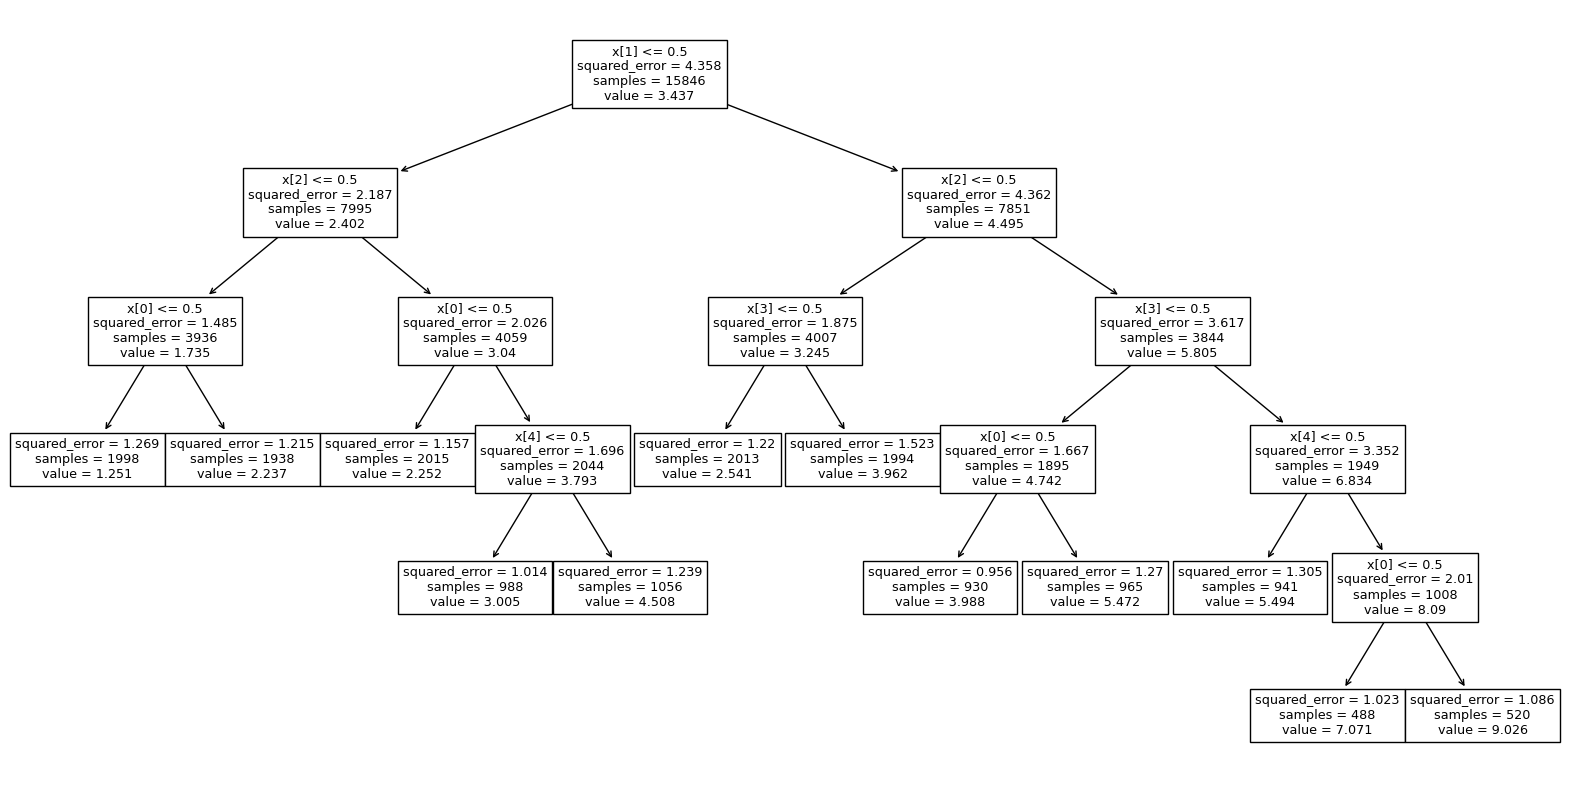

In [247]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
plot_tree(tree.estimator.estimators_[0])